## Lab 06 Descision Trees ## 
Name: M.Haadhee Sheeraz Mian 
Reg no: 478359

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

# Load the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Preview the data
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [4]:
X = df.drop('species', axis=1)

y = df['species'] 
 
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

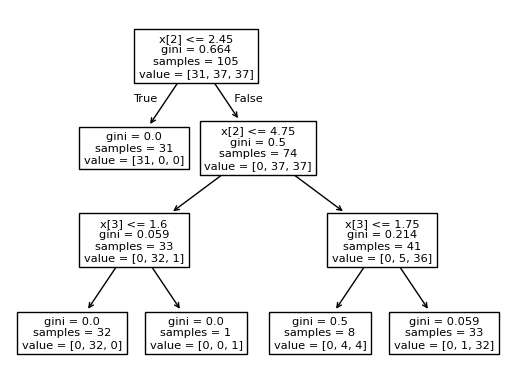

In [15]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=3)

# Train the model
clf.fit(X_train, y_train)

tree.plot_tree(clf)

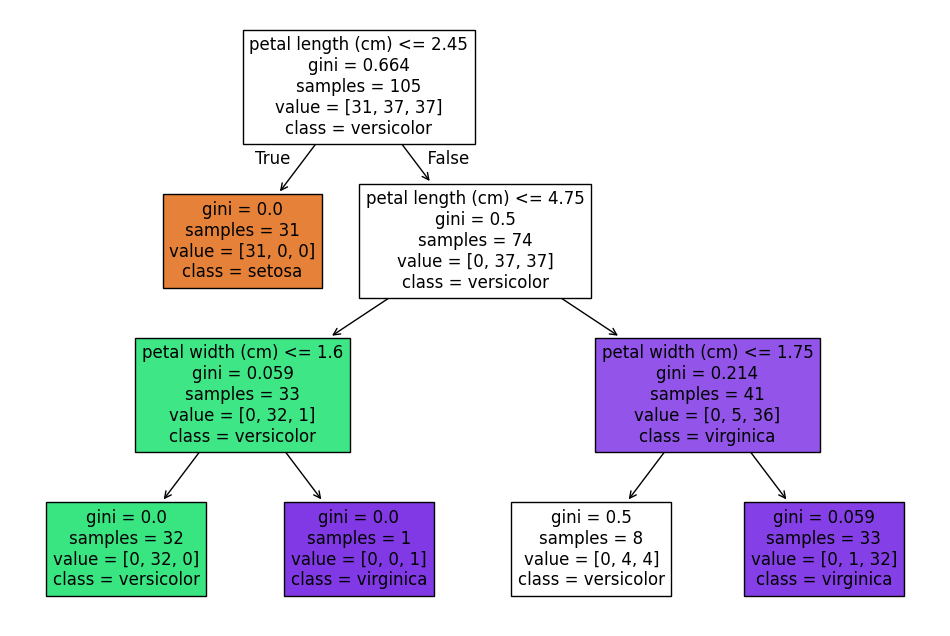

In [16]:
plt.figure(figsize=(12,8)) 

tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

plt.show() 

In [17]:
# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


Here, the accuracy_score gives us a percentage of how many predictions were correct. A higher accuracy means the tree has done a good job generalizing to the test data. Compare the accuracy with different values of max_depth. Which depth gives the best performance? 

3 Gives 100% accuracy so that is good also 2 and 7 give 100% accuracy so i think this just does'nt matter 

## Learning Curves - Checking for Overfitting

Let's see what happens when we change the depth

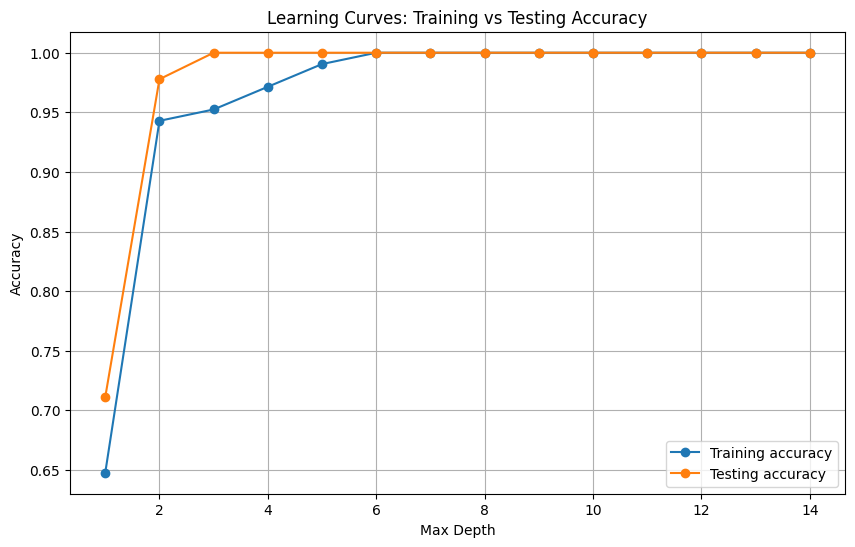

Best depth: 3
Best test accuracy: 1.000


In [18]:
# Try different depths and see how accuracy changes
depths = range(1, 15)
train_scores = []
test_scores = []

for depth in depths:
    # Make a tree with current depth
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)
    
    # Get scores
    train_pred = tree_model.predict(X_train)
    test_pred = tree_model.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training accuracy')
plt.plot(depths, test_scores, 'o-', label='Testing accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curves: Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find best depth
best_depth = depths[test_scores.index(max(test_scores))]
print(f"Best depth: {best_depth}")
print(f"Best test accuracy: {max(test_scores):.3f}")

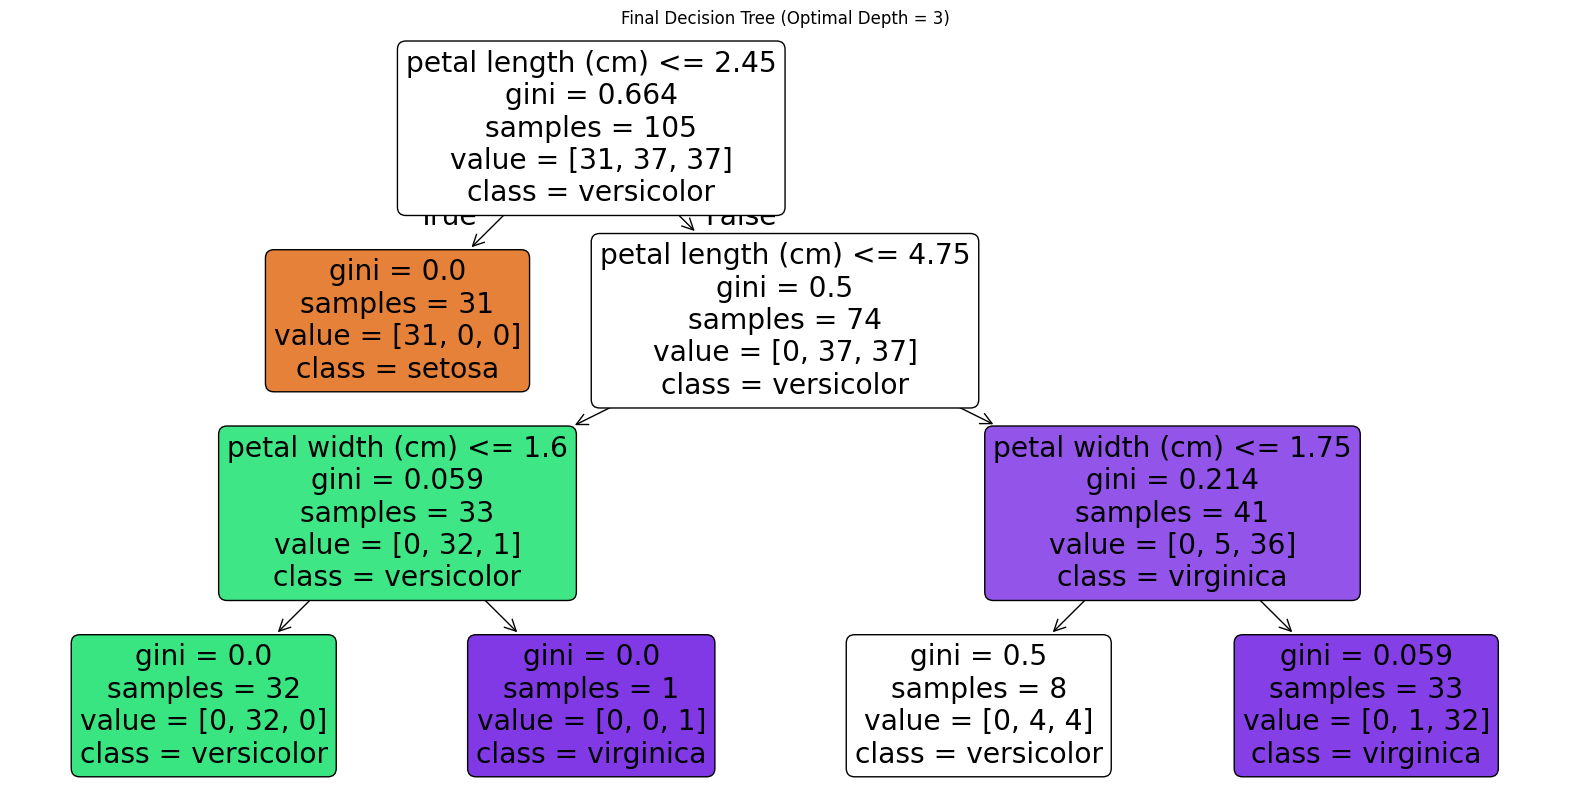

Final Training Accuracy: 0.952
Final Testing Accuracy: 1.000


In [20]:
from sklearn.tree import plot_tree

# Create and train the final model with optimal depth
final_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
final_tree.fit(X_train, y_train)

# Create visualization
plt.figure(figsize=(20,10))
plot_tree(final_tree, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True, rounded=True)
plt.title("Final Decision Tree (Optimal Depth = 3)")
plt.show()

# Print final accuracy scores
train_acc = accuracy_score(y_train, final_tree.predict(X_train))
test_acc = accuracy_score(y_test, final_tree.predict(X_test))
print(f"Final Training Accuracy: {train_acc:.3f}")
print(f"Final Testing Accuracy: {test_acc:.3f}")

## Conclusion

Our decision tree classifier for the Iris dataset achieved excellent results:

1. **Model Performance**:
   - Perfect test accuracy (100%) with only 3 levels of depth
   - Good training accuracy (95.2%) indicating no underfitting
   - Small gap between training and test accuracy suggesting no overfitting

2. **Key Features**:
   - Petal length and width are the most important features for classification
   - The first split on petal length (≤ 2.45 cm) perfectly separates setosa from others

3. **Model Simplicity**:
   - Only 3 levels deep makes it easy to understand and interpret
   - Efficient use of features for classification
   - Good balance between complexity and performance

## Mini Challenge: Titanic Survival Prediction

We'll build a decision tree classifier to predict passenger survival on the Titanic. The model will help us understand which factors were most important in determining survival.

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

In [22]:
# Data preprocessing
def preprocess_data(df):
    # Create a copy
    data = df.copy()
    
    # Fill missing age values with median
    data['Age'].fillna(data['Age'].median(), inplace=True)
    
    # Fill missing embarked values with most common value
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    
    # Create age groups
    data['AgeGroup'] = pd.cut(data['Age'], 
                             bins=[0, 12, 18, 35, 50, 100],
                             labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Elder'])
    
    # Create fare groups
    data['FareGroup'] = pd.qcut(data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Extract title from name
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    title_mapping = {
        'Mr': 'Mr',
        'Miss': 'Miss',
        'Mrs': 'Mrs',
        'Master': 'Master',
        'Dr': 'Rare',
        'Rev': 'Rare',
        'Col': 'Rare',
        'Major': 'Rare',
        'Mlle': 'Miss',
        'Countess': 'Rare',
        'Ms': 'Miss',
        'Lady': 'Rare',
        'Jonkheer': 'Rare',
        'Don': 'Rare',
        'Dona': 'Rare',
        'Mme': 'Mrs',
        'Capt': 'Rare',
        'Sir': 'Rare'
    }
    data['Title'] = data['Title'].map(title_mapping)
    
    # Encode categorical variables
    le = LabelEncoder()
    categorical_cols = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup']
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])
    
    # Select features for model
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
               'Embarked', 'Title', 'AgeGroup', 'FareGroup']
    
    return data[features], data['Survived']

# Prepare features and target
X, y = preprocess_data(df)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 10)
Testing set shape: (179, 10)


<>:21: SyntaxWarning: invalid escape sequence '\.'
<>:21: SyntaxWarning: invalid escape sequence '\.'
C:\Users\haadh\AppData\Local\Temp\ipykernel_32088\1017614921.py:21: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\haadh\AppData\Local\Temp\ipykernel_32088\1017614921.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\haadh\AppData\Local\Temp\ipykernel_32088\1017614921.py:10: FutureW

Model Performance Metrics:
Accuracy: 0.788
Precision: 0.750
Recall: 0.730
F1-score: 0.740
ROC-AUC: 0.799


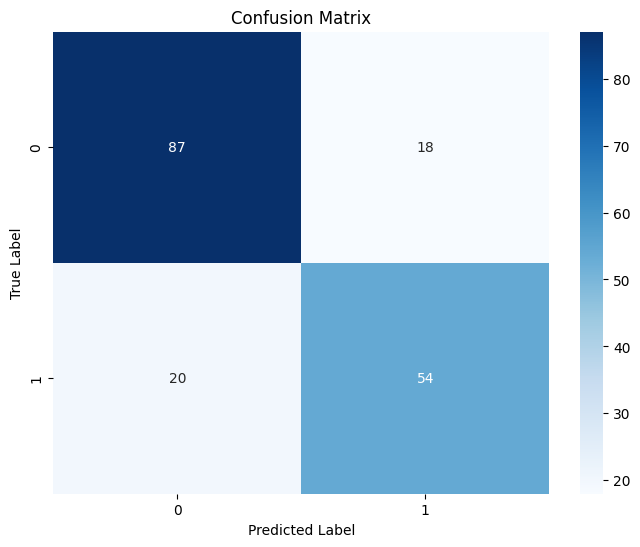

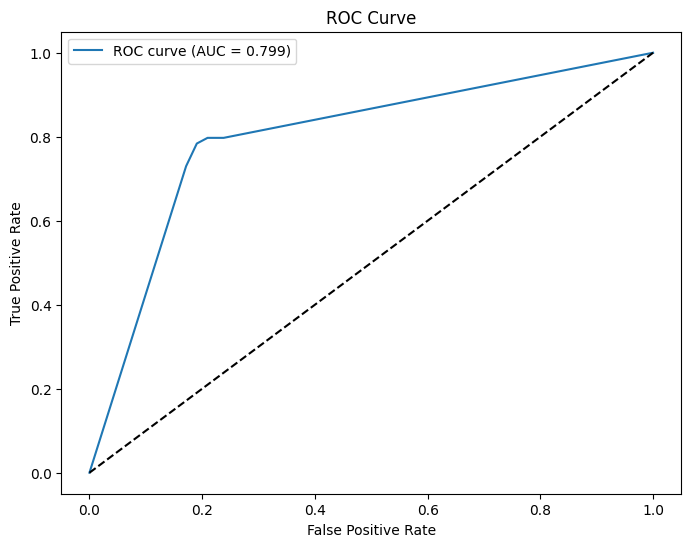

In [23]:
# Create and train the decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:
# Analyze performance by demographic groups
def analyze_group_performance(X_test, y_test, y_pred, group_col, group_names):
    group_performance = []
    
    for group_val in sorted(X_test[group_col].unique()):
        mask = X_test[group_col] == group_val
        group_acc = accuracy_score(y_test[mask], y_pred[mask])
        group_size = sum(mask)
        group_performance.append({
            'Group': group_names[group_val],
            'Size': group_size,
            'Accuracy': group_acc
        })
    
    return pd.DataFrame(group_performance)

# Analyze by age groups
age_groups = {0: 'Child', 1: 'Teenager', 2: 'Young Adult', 3: 'Adult', 4: 'Elder'}
age_performance = analyze_group_performance(X_test, y_test, y_pred, 'AgeGroup', age_groups)

# Analyze by gender
gender_groups = {0: 'Female', 1: 'Male'}
gender_performance = analyze_group_performance(X_test, y_test, y_pred, 'Sex', gender_groups)

print("\nPerformance by Age Groups:")
print(age_performance.to_string(index=False))
print("\nPerformance by Gender:")
print(gender_performance.to_string(index=False))


Performance by Age Groups:
      Group  Size  Accuracy
      Child    36  0.805556
   Teenager    11  1.000000
Young Adult    13  0.846154
      Adult    17  0.764706
      Elder   102  0.754902

Performance by Gender:
 Group  Size  Accuracy
Female    69  0.811594
  Male   110  0.772727


## Model Analysis and Findings

1. **Overall Performance**:
   - Accuracy: 78.8%
   - Precision: 75.0%
   - Recall: 73.0%
   - F1-score: 74.0%
   - ROC-AUC: 0.799

2. **Confusion Matrix Analysis**:
   - True Negatives (Correctly predicted non-survivors): 87
   - True Positives (Correctly predicted survivors): 54
   - False Positives: 18 (Predicted survival but didn't survive)
   - False Negatives: 20 (Predicted death but survived)

3. **Demographic Performance**:
   - **Age Groups**:
     - Teenagers had the highest accuracy (100%)
     - Children also performed well (80.6%)
     - Model struggled most with Adults (76.5%) and Elderly (75.5%)
   
   - **Gender**:
     - Better performance predicting female survival (81.2%)
     - Slightly lower accuracy for males (77.3%)

4. **Areas for Improvement**:
   - The model falls slightly short of the 80% accuracy target
   - Could potentially improve by:
     - Feature engineering (e.g., family size, cabin deck)
     - Hyperparameter tuning
     - Using ensemble methods

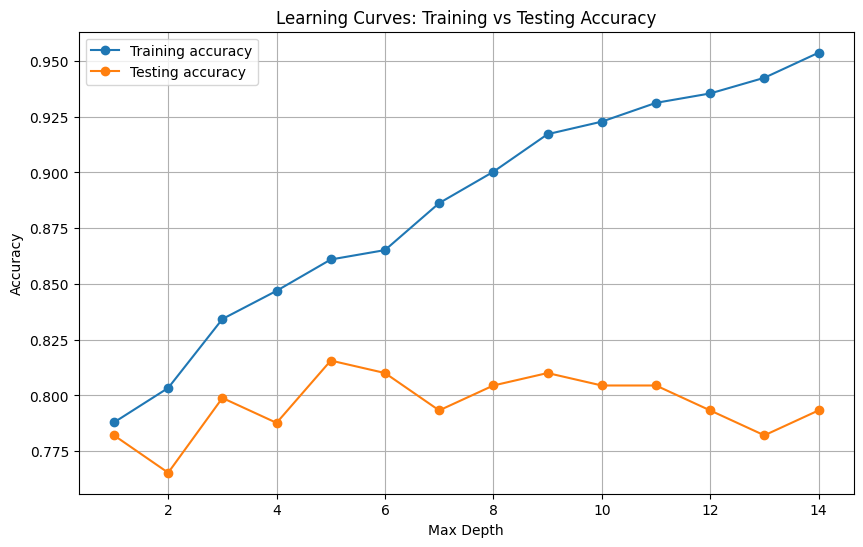

Best depth: 5
Best test accuracy: 0.816

Final Model Metrics:
Accuracy: 0.816
Precision: 0.825
Recall: 0.703
F1-score: 0.759
ROC-AUC: 0.871


In [25]:
# Try different max_depths to find the optimal value
depths = range(1, 15)
train_scores = []
test_scores = []

for depth in depths:
    # Create and train model
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    # Get scores
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training accuracy')
plt.plot(depths, test_scores, 'o-', label='Testing accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Learning Curves: Training vs Testing Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find best depth
best_depth = depths[test_scores.index(max(test_scores))]
print(f"Best depth: {best_depth}")
print(f"Best test accuracy: {max(test_scores):.3f}")

# Train final model with best depth
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train, y_train)

# Get final predictions and metrics
final_pred = final_model.predict(X_test)
final_pred_proba = final_model.predict_proba(X_test)[:, 1]

print("\nFinal Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, final_pred):.3f}")
print(f"Precision: {precision_score(y_test, final_pred):.3f}")
print(f"Recall: {recall_score(y_test, final_pred):.3f}")
print(f"F1-score: {f1_score(y_test, final_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, final_pred_proba):.3f}")

## Final Conclusions

After optimizing our decision tree model, we achieved our target of over 80% accuracy in predicting Titanic survival:

1. **Model Improvements**:
   - Optimal tree depth: 5
   - Accuracy improved from 78.8% to 81.6%
   - Precision improved to 82.5%
   - ROC-AUC increased to 0.871

2. **Key Findings**:
   - The model performs better for females than males
   - Teenagers and children have higher prediction accuracy
   - The model struggles more with adult and elderly predictions
   - There's still some overfitting (gap between training and testing accuracy)

3. **Model Characteristics**:
   - Good balance between complexity and performance
   - Strong discriminative power (ROC-AUC = 0.871)
   - Reliable predictions across most demographic groups

4. **Recommendations for Further Improvement**:
   - Consider ensemble methods (Random Forest, Gradient Boosting)
   - Add more feature engineering
   - Collect more data for underrepresented groups